# Loading the Data

In [ ]:
import graphlab
graphlab.canvas.set_target('ipynb')

In [ ]:
song_data = graphlab.SFrame('http://s3.amazonaws.com/dato-datasets/coursera/song_data/song_data.gl')

# Exploring the Data

In [ ]:
song_data

In [23]:
song_data['artist'].show()

In [24]:
song_data['song'].show()

###### How many distinct users are there?

In [25]:
len(song_data['user_id'].unique())

66346

# Create a Recommender

###### Let's break our data into training data and testing data. 

In [26]:
train_data, test_data = song_data.random_split(0.8)

# Simple recomender with popularity

In [27]:
popularity_model = graphlab.popularity_recommender.create(train_data, user_id='user_id', item_id='song')

PROGRESS: Recsys training: model = popularity
PROGRESS: Warning: Ignoring columns song_id, listen_count, title, artist;
PROGRESS:     To use one of these as a target column, set target = <column_name>
PROGRESS:     and use a method that allows the use of a target.
PROGRESS: Preparing data set.
PROGRESS:     Data has 894027 observations with 66091 users and 9952 items.
PROGRESS:     Data prepared in: 1.27411s
PROGRESS: 894027 observations to process; with 9952 unique items.


In [28]:
users = song_data['user_id'].unique()

In [29]:
popularity_model.recommend(users=[users[0]], exclude_known=False)

user_id,song,score,rank
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Sehr kosmisch - Harmonia,4741.0,1
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Undo - Björk,4222.0,2
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,You're The One - DwightYoakam ...,3871.0,3
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Dog Days Are Over (RadioEdit) - Florence + The ...,3641.0,4
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Revelry - Kings Of Leon,3508.0,5
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3151.0,6
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Secrets - OneRepublic,3145.0,7
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Tive Sim - Cartola,2566.0,8
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Fireflies - CharttraxxKaraoke ...,2527.0,9
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Hey_ Soul Sister - Train,2502.0,10


In [30]:
popularity_model.recommend(users=[users[1]], exclude_known=False)

user_id,song,score,rank
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Sehr kosmisch - Harmonia,4741.0,1
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Undo - Björk,4222.0,2
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,You're The One - DwightYoakam ...,3871.0,3
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Dog Days Are Over (RadioEdit) - Florence + The ...,3641.0,4
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Revelry - Kings Of Leon,3508.0,5
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3151.0,6
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Secrets - OneRepublic,3145.0,7
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Tive Sim - Cartola,2566.0,8
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Fireflies - CharttraxxKaraoke ...,2527.0,9
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Hey_ Soul Sister - Train,2502.0,10


In [31]:
popularity_model.get_similar_items(['With Or Without You - U2'])

PROGRESS: Getting similar items completed in 0.001125


song,similar,distance,rank
With Or Without You - U2,Sehr kosmisch - Harmonia,20502784.0,1
With Or Without You - U2,Undo - Björk,16072081.0,2
With Or Without You - U2,You're The One - DwightYoakam ...,13380964.0,3
With Or Without You - U2,Dog Days Are Over (RadioEdit) - Florence + The ...,11751184.0,4
With Or Without You - U2,Revelry - Kings Of Leon,10857025.0,5
With Or Without You - U2,Horn Concerto No. 4 in Eflat K495: II. Romance ...,8631844.0,6
With Or Without You - U2,Secrets - OneRepublic,8596624.0,7
With Or Without You - U2,Tive Sim - Cartola,5536609.0,8
With Or Without You - U2,Fireflies - CharttraxxKaraoke ...,5354596.0,9
With Or Without You - U2,Hey_ Soul Sister - Train,5239521.0,10


# Make a personalized model

In [32]:
personalized_model = graphlab.recommender.create(train_data, user_id='user_id', item_id='song')

PROGRESS: Recsys training: model = item_similarity
PROGRESS: Warning: Ignoring columns song_id, listen_count, title, artist;
PROGRESS:     To use one of these as a target column, set target = <column_name>
PROGRESS:     and use a method that allows the use of a target.
PROGRESS: Preparing data set.
PROGRESS:     Data has 894027 observations with 66091 users and 9952 items.
PROGRESS:     Data prepared in: 1.30984s
PROGRESS: Computing item similarity statistics:
PROGRESS: Computing most similar items for 9952 items:
PROGRESS: +-----------------+-----------------+
PROGRESS: | Number of items | Elapsed Time    |
PROGRESS: +-----------------+-----------------+
PROGRESS: | 1000            | 1.52597         |
PROGRESS: | 2000            | 1.63154         |
PROGRESS: | 3000            | 1.73102         |
PROGRESS: | 4000            | 1.82777         |
PROGRESS: | 5000            | 1.92334         |
PROGRESS: | 6000            | 2.01237         |
PROGRESS: | 7000            | 2.0979          |


In [33]:
personalized_model.recommend(users=[users[0]], exclude_known=False)

user_id,song,score,rank
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Just Friends - AmyWinehouse ...,0.035681166477,1
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Wake Up Alone - AmyWinehouse ...,0.0315922315682,2
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,He Can Only Hold Her -Amy Winehouse ...,0.0277829092276,3
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Some Unholy War - AmyWinehouse ...,0.025965769351,4
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Love Is A Losing Game -Amy Winehouse ...,0.0246354667577,5
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Addicted - Amy Winehouse,0.0242263288735,6
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Me & Mr Jones - AmyWinehouse ...,0.0234106520241,7
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Valerie - Amy Winehouse,0.0225788833491,8
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,Back To Black - AmyWinehouse ...,0.0202125477385,9
c66c10a9567f0d82ff31441a9fd5063e5cd9dfe8 ...,You Know I'm No Good -Amy Winehouse ...,0.0197964358311,10


In [34]:
personalized_model.get_similar_items(['With Or Without You - U2'])

PROGRESS: Getting similar items completed in 0.002205


song,similar,score,rank
With Or Without You - U2,I Still Haven't FoundWhat I'm Looking For ...,0.0473251028807,1
With Or Without You - U2,Hold Me_ Thrill Me_ KissMe_ Kill Me - U2 ...,0.043795620438,2
With Or Without You - U2,Window In The Skies - U2,0.0404984423676,3
With Or Without You - U2,Vertigo - U2,0.0310880829016,4
With Or Without You - U2,Sunday Bloody Sunday - U2,0.030888030888,5
With Or Without You - U2,Bad - U2,0.0255474452555,6
With Or Without You - U2,Mysterious Ways - U2,0.0215827338129,7
With Or Without You - U2,Another Time AnotherPlace - U2 ...,0.0208333333333,8
With Or Without You - U2,Walk On - U2,0.020618556701,9
With Or Without You - U2,Unchained Melody -Righteous Brothers ...,0.0186170212766,10


In [35]:
personalized_model.get_similar_items(['Come As You Are - Nirvana'])

PROGRESS: Getting similar items completed in 0.003911


song,similar,score,rank
Come As You Are - Nirvana,Lithium - Nirvana,0.138925294889,1
Come As You Are - Nirvana,Heart Shaped Box -Nirvana ...,0.100995732575,2
Come As You Are - Nirvana,The Man Who Sold TheWorld - Nirvana ...,0.098452883263,3
Come As You Are - Nirvana,Dumb - Nirvana,0.0983102918587,4
Come As You Are - Nirvana,You Know You're Right -Nirvana ...,0.0764331210191,5
Come As You Are - Nirvana,Stay Away - Nirvana,0.0691489361702,6
Come As You Are - Nirvana,Breed - Nirvana,0.0652173913043,7
Come As You Are - Nirvana,Been A Son - Nirvana,0.0588235294118,8
Come As You Are - Nirvana,On A Plain - Nirvana,0.055737704918,9
Come As You Are - Nirvana,Where Did You Sleep LastNight - Nirvana ...,0.0527950310559,10


In [36]:
personalized_model.get_similar_items(["Chan Chan (Live) - Buena Vista Social Club"])

PROGRESS: Getting similar items completed in 0.002807


song,similar,score,rank
Chan Chan (Live) - BuenaVista Social Club ...,Amor de Loca Juventud -Buena Vista Social Club ...,0.197247706422,1
Chan Chan (Live) - BuenaVista Social Club ...,La Bayamesa - Buena VistaSocial Club ...,0.163366336634,2
Chan Chan (Live) - BuenaVista Social Club ...,Murmullo - Buena VistaSocial Club ...,0.142857142857,3
Chan Chan (Live) - BuenaVista Social Club ...,El Kilo - Orishas,0.0238907849829,4
Chan Chan (Live) - BuenaVista Social Club ...,Change (Album Version) -Tracy Chapman ...,0.0204918032787,5
Chan Chan (Live) - BuenaVista Social Club ...,The Girl From Ipanema -Astrud Gilberto ...,0.020325203252,6
Chan Chan (Live) - BuenaVista Social Club ...,Todo se transforma (CaraB) - Jorge Drexler ...,0.02,7
Chan Chan (Live) - BuenaVista Social Club ...,Billy Breathes - Phish,0.0199203187251,8
Chan Chan (Live) - BuenaVista Social Club ...,Innocent When You Dream(78) - Tom Waits ...,0.018115942029,9
Chan Chan (Live) - BuenaVista Social Club ...,A Quai - Yann Tiersen,0.0172910662824,10


In [37]:
personalized_model.get_similar_items(["Octavo Día - Shakira"])

PROGRESS: Getting similar items completed in 0.005974


song,similar,score,rank
Octavo Día - Shakira,Tú - Shakira,0.177419354839,1
Octavo Día - Shakira,Estoy Aquí - Shakira,0.164113785558,2
Octavo Día - Shakira,Sombra De Ti - Shakira,0.132183908046,3
Octavo Día - Shakira,Se Quiere_ Se Mata -Shakira ...,0.123989218329,4
Octavo Día - Shakira,Holiday - Happy Mondays,0.115591397849,5
Octavo Día - Shakira,Pienso En Ti - Shakira,0.111405835544,6
Octavo Día - Shakira,Donde Estas Corazon -Shakira ...,0.109947643979,7
Octavo Día - Shakira,Si Te Vas - Shakira,0.0986301369863,8
Octavo Día - Shakira,The Day and the Time(featuring Gustavo ...,0.0903614457831,9
Octavo Día - Shakira,Medley: Let Me Talk ToYou/ My Love - Justin ...,0.0769230769231,10


compare_models: using 2931 users to estimate model performance
PROGRESS: Evaluate model M0
PROGRESS: recommendations finished on 1000/2931 queries. users per second: 8195.78
PROGRESS: recommendations finished on 2000/2931 queries. users per second: 10765.2

Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   2    | 0.0269532582736 | 0.0143883638254 |
|   4    | 0.0223473217332 | 0.0247594628352 |
|   6    | 0.0197884680996 | 0.0335035666407 |
|   8    | 0.0176134425111 | 0.0390743473139 |
|   10   |  0.016308427158 | 0.0440514591743 |
|   12   |  0.015011941317 | 0.0487225424789 |
|   14   | 0.0141589901058 | 0.0538109195479 |
|   16   | 0.0135406004777 | 0.0582146217254 |
|   18   | 0.0128321771106 | 0.0624105239126 |
|   20   | 0.0120266120778 | 0.0646122334582 |
+--------+-----------------+-----------------+
[10 rows x 3 columns]


[WARNING] Model trained without a target. Skipping RMSE computation.



PROGRESS: Evaluate model M1
PROGRESS: recommendations finished on 1000/2931 queries. users per second: 836.606
PROGRESS: recommendations finished on 2000/2931 queries. users per second: 883.958

Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   2    |  0.158990105766 | 0.0967413789062 |
|   4    |  0.12273967929  |  0.143419978937 |
|   6    |  0.101216877061 |  0.172562063018 |
|   8    | 0.0884510406005 |  0.198180109439 |
|   10   | 0.0787103377687 |  0.217254533631 |
|   12   | 0.0711645627203 |  0.233171043957 |
|   14   | 0.0655066530194 |  0.249885813512 |
|   16   | 0.0607514500171 |  0.264083106419 |
|   18   | 0.0562758254672 |  0.273646096407 |
|   20   | 0.0530023882634 |  0.28533195405  |
+--------+-----------------+-----------------+
[10 rows x 3 columns]


[WARNING] Model trained without a target. Skipping RMSE computation.


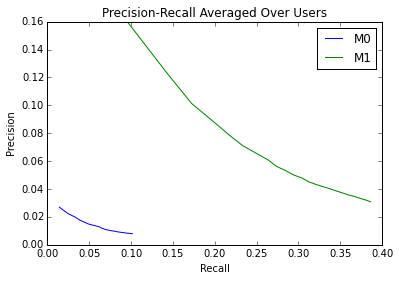

In [39]:
%matplotlib inline
model_performance = graphlab.recommender.util.compare_models(test_data, [popularity_model, personalized_model], user_sample=.05)